In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from download_files import get_state_data, read_json

counties, voting_locations = get_state_data('data/counties.json', 'data/voting_location.json')
population_data = read_json('data/georgia_county_population_data.json')
black_population_count = read_json('data/georgia_county_percent_black.json')
white_population_count = read_json('data/georgia_county_percent_white.json')

reading file: data/counties.json
reading file: data/voting_location.json
reading file: data/georgia_county_population_data.json
reading file: data/georgia_county_percent_black.json
reading file: data/georgia_county_percent_white.json


In [44]:
county_data = []
for county_id, county_name in counties.items():
    county_data.append({
        "county" : county_name,
        "population" : population_data[county_name],
        "percent_black" : black_population_count[county_name],
        "percent_white" : white_population_count[county_name],
        "polling_count" : len(voting_locations[county_name])
                       })
df_county_data = pd.DataFrame(county_data)

In [45]:
df_county_data['people_per_polling_loc'] = df_county_data.population / df_county_data.polling_count

In [47]:
df_county_data.sort_values("percent_white")

,county,population,percent_black,percent_white,polling_count,people_per_polling_loc
30,CLAYTON,289615,72.1,9.6,6,48269.166667
127,STEWART,6199,48.7,23.7,1,6199.000000
46,DOUGHERTY,91243,70.9,24.4,1,91243.000000
69,HANCOCK,8348,71.2,24.5,1,8348.000000
43,DEKALB,756558,54.9,29.2,13,58196.769231
...,...,...,...,...,...,...
111,PICKENS,31980,1.2,93.6,1,31980.000000
143,UNION,24001,0.9,93.6,1,24001.000000
40,DADE,16226,1.2,93.7,1,16226.000000
138,TOWNS,11852,1.3,94.0,1,11852.000000


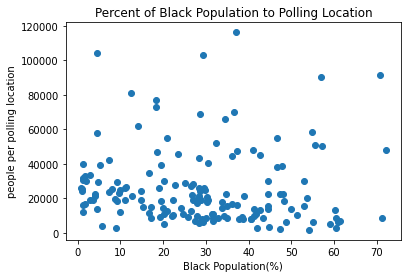

array([[ 1.        , -0.04243379],
       [-0.04243379,  1.        ]])

In [50]:
x = df_county_data.percent_black
y = df_county_data.people_per_polling_loc

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('people per polling location')
ax1.set_title('Percent of Black Population to Polling Location')
ax1.set_xlabel('Black Population(%)')
plt.scatter(x, y)
plt.show()
np.corrcoef(x, y)

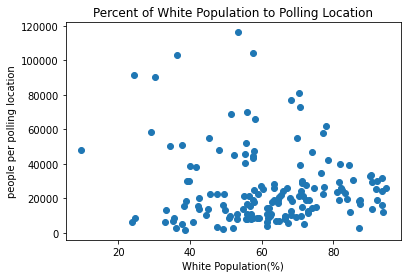

array([[ 1.        , -0.08307811],
       [-0.08307811,  1.        ]])

In [51]:
x = df_county_data.percent_white
y = df_county_data.people_per_polling_loc

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('people per polling location')
ax1.set_title('Percent of White Population to Polling Location')
ax1.set_xlabel('White Population(%)')
plt.scatter(x, y)
plt.show()
np.corrcoef(x, y)